After seeing the overfitting behvaior from the Linear Regression Model, we decided to try out the Random Forest Model. A Random Forest is an ensemble method, comprised of numerous decision trees.

In [1]:
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = quandl.get("WIKI/TWTR")
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,32.19,33.15,32.0500,32.73,43359002.0,0.0,1.0,32.19,33.15,32.0500,32.73,43359002.0
2018-03-22,31.77,32.13,31.1750,31.20,29284239.0,0.0,1.0,31.77,32.13,31.1750,31.20,29284239.0
2018-03-23,31.26,32.00,30.7907,31.03,24478532.0,0.0,1.0,31.26,32.00,30.7907,31.03,24478532.0
2018-03-26,31.69,32.47,30.7000,31.91,25477813.0,0.0,1.0,31.69,32.47,30.7000,31.91,25477813.0
2018-03-27,31.85,31.90,27.8800,28.07,79821992.0,0.0,1.0,31.85,31.90,27.8800,28.07,79821992.0


In [3]:
# Create Features

data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj. Close'].pct_change()
data['std_5'] = data['percent_change'].rolling(5).std()
data['ret_5'] = data['percent_change'].rolling(5).mean()
data.dropna(inplace=True)

# X is the input variable
X = data[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# y is the target or output variable
y = np.where(data['Adj. Close'].shift(-1) > data['Adj. Close'], 1, -1)

In [4]:
## Split data ##
# data length 
data_length = data.shape[0]

# Training dataset length - where 75% training, 25%
split = int(data_length * 0.75)
split

822

In [5]:
# x/y train and test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print size of train and test dataset to verify dimensions
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(822, 4) (275, 4)
(822,) (275,)


In [7]:
# Establish and train Random Forest model
rf = RandomForestClassifier(random_state = 5)
model = rf.fit(X_train, y_train)

# Test and find accuracy
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  46.909090909090914


C:\Users\Desmond\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [8]:
# View classifcation reports 
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.48      0.64      0.54       137
           1       0.46      0.30      0.37       138

    accuracy                           0.47       275
   macro avg       0.47      0.47      0.45       275
weighted avg       0.47      0.47      0.45       275



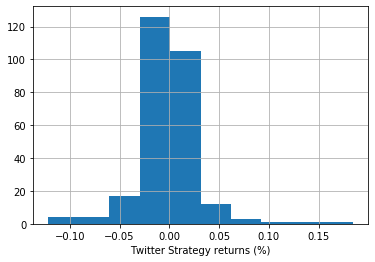

In [12]:
# Create new feature that quantifies returns
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

# Plot Return Histograms
# This plot represents the returns in %, and how often they have occurred.
data.strategy_returns[split:].hist()
plt.xlabel('Twitter Strategy returns (%)')
plt.show()

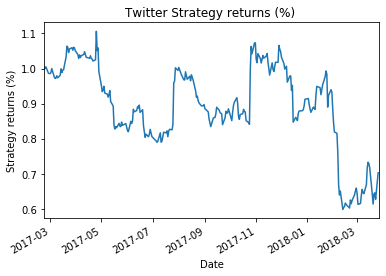

In [11]:
# This plot shows how the returns fluctuate over time.
(data.strategy_returns[split:]+1).cumprod().plot()
plt.title("Twitter Strategy returns (%) ")
plt.ylabel('Strategy returns (%)')
plt.show()

With an accuracy score much lower than the previous models that we've tested before, the Random Forest shows signs of underfitting, while attaining a decent generalization of the dataset. The graphs created from the output of the model allow an investor to see how often large returns are seen from a certain stock, which can persaude them to invest, or to look elsewhere. 
<br>
Once again, we have built a model that provides us insight, but doesn't give us a viable means to predict the behavior of a stock correctly.